## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
    !apt install libspatialindex-dev -qq
    !pip install fiona shapely pyproj rtree --quiet
    !pip install geopandas --quiet
    !pip install contextily

In [ ]:
import os
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely.geometry import Point, LineString


In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/spatialthoughts/python-tutorials/raw/main/data/' +
         'Address_Points.zip')
download('https://github.com/spatialthoughts/python-tutorials/raw/main/data/' +
         'Adult_Mental_Health_Providers.zip')

Downloaded data/Address_Points.zip
Downloaded data/Adult_Mental_Health_Providers.zip


In [ ]:
ORS_API_KEY = '5b3ce3597851110001cf624888ba831a11c14956a805c14ded881c61'

## Procedure

In [ ]:
health_shp = 'Adult_Mental_Health_Providers.zip'
health_shp_path = os.path.join(data_folder, health_shp)
health_gdf = gpd.read_file(health_shp_path)
health_gdf

,OBJECTID,NAME,XCOORD,YCOORD,ADDRESS_ID,ADDRESS,geometry
0,1,Anchor Mental Health,400686.38,140381.22,289589,1001 LAWRENCE STREET NE,POINT (-76.99209 38.93132)
1,2,"Capital Community Services, LLC",400882.92,133122.47,278056,2041 MARTIN LUTHER KING JR AVENUE SE,POINT (-76.98983 38.86593)
2,3,CPEP,402284.84,134922.1,303596,1905 E STREET SE,POINT (-76.97367 38.88214)
3,4,Deaf-Reach,400800.33,140588.61,33726,3521 12TH STREET NE,POINT (-76.99077 38.93319)
4,5,Green Door,397593,141469.99,225296,1221 TAYLOR STREET NW,POINT (-77.02777 38.94112)
5,6,McClendon Center,397292.44,136903.07,279043,1313 NEW YORK AVENUE NW,POINT (-77.03122 38.89998)
6,7,McClendon Center,399186.75,137839.02,236989,1338 NORTH CAPITOL STREET NW,POINT (-77.00938 38.90842)
7,8,Neighbors Consejo,396806.73,140159.22,236410,3118 16TH STREET NW,POINT (-77.03683 38.92931)
8,9,Pathways To Housing,399464.96,138105.77,75978,101 Q STREET NE,POINT (-77.00617 38.91082)
9,10,Psychiatric Center Chartered,403447.95,140054.18,287351,3001 BLADENSBURG ROAD NE,POINT (-76.96024 38.92837)


In [ ]:
address_shp = 'Address_Points.zip'
adddress_shp_path = os.path.join(data_folder, address_shp)
address_gdf = gpd.read_file(adddress_shp_path)
address_gdf

,OBJECTID_1,OBJECTID,SITE_ADDRE,ADDRESS_ID,ROADWAYSEG,STATUS,SSL,TYPE_,ENTRANCETY,ADDRNUM,...,ACTIVE_RES,RES_TYPE,ACTIVE_R_1,WARD_2002,WARD_2012,ANC_2002,ANC_2012,SMD_2002,SMD_2012,geometry
0,832136,3396.0,50921,50921,10460.0,ACTIVE,0757 0849,ADDRESS,OFFICIAL,217.0,...,0,RESIDENTIAL,1,Ward 6,Ward 6,ANC 6C,ANC 6C,SMD 6C08,SMD 6C02,POINT (-77.00281 38.89344)
1,832838,625.0,15061,15061,177.0,ACTIVE,1043 0863,ADDRESS,OFFICIAL,502.0,...,0,RESIDENTIAL,1,Ward 6,Ward 6,ANC 6B,ANC 6B,SMD 6B06,SMD 6B06,POINT (-76.98806 38.88265)
2,835000,1295.0,12265,12265,12996.0,ACTIVE,0834 0080,ADDRESS,OFFICIAL,516.0,...,0,RESIDENTIAL,1,Ward 6,Ward 6,ANC 6C,ANC 6C,SMD 6C05,SMD 6C05,POINT (-76.99886 38.89753)
3,835839,6690.0,145709,145709,9398.0,ACTIVE,0871 0033,ADDRESS,OFFICIAL,634.0,...,9,RESIDENTIAL,9,Ward 6,Ward 6,ANC 6B,ANC 6B,SMD 6B02,SMD 6B02,POINT (-76.99727 38.88729)
4,837003,8487.0,226389,226389,10939.0,ACTIVE,2853 0204,ADDRESS,OFFICIAL,1117.0,...,2,RESIDENTIAL,2,Ward 1,Ward 1,ANC 1A,ANC 1A,SMD 1A11,SMD 1A11,POINT (-77.02804 38.92692)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,970868,60564.0,231545,231545,13092.0,ACTIVE,2853 0860,ADDRESS,OFFICIAL,2900.0,...,2,RESIDENTIAL,2,Ward 1,Ward 1,ANC 1A,ANC 1A,SMD 1A11,SMD 1A11,POINT (-77.02733 38.92686)
96,972246,13039.0,260313,260313,15025.0,ACTIVE,2335 0117,ADDRESS,OFFICIAL,6136.0,...,0,RESIDENTIAL,1,Ward 4,Ward 4,ANC 3G,ANC 3G,SMD 3G02,SMD 3G02,POINT (-77.06086 38.97097)
97,975435,79362.0,238210,238210,12222.0,ACTIVE,0552 0218,ADDRESS,OFFICIAL,120.0,...,2,RESIDENTIAL,2,Ward 5,Ward 5,ANC 5C,ANC 5E,SMD 5C01,SMD 5E05,POINT (-77.01294 38.91023)
98,997791,NaN,314564,314564,40238.0,ACTIVE,3765 0005,ADDRESS,OFFICIAL,455.0,...,0,NON RESIDENTIAL,0,Ward 5,Ward 5,ANC 5A,ANC 5A,SMD 5A02,SMD 5A08,POINT (-76.99921 38.95365)


Let's visualize the locations.

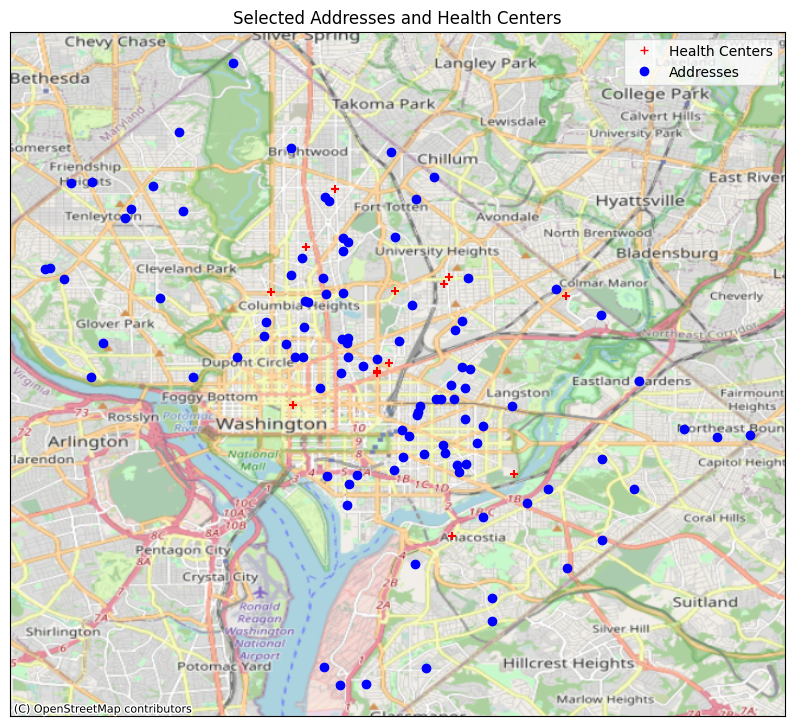

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
address_gdf.plot(ax=ax, color='blue', alpha=1, marker='o')
health_gdf.plot(ax=ax, color='red', alpha=1, marker='+')
cx.add_basemap(ax, crs=health_gdf.crs, source=cx.providers.OpenStreetMap.Mapnik)

legend_elements = [
    plt.plot([],[], color='red', alpha=1, marker='+', label='Health Centers', ls='')[0],
    plt.plot([],[], color='blue', alpha=1, marker='o', label='Addresses', ls='')[0]]
ax.legend(handles=legend_elements, loc='upper right')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Selected Addresses and Health Centers')

plt.show()

To standardize the workflow, we rename the dataframes to appropriate names and select the attribute containing the names we want in the output. You should change it to match your datasets.

In [ ]:
origin_gdf = address_gdf
origin_name_column = 'OBJECTID_1'
destination_gdf = health_gdf
destination_name_column = 'NAME'

In [ ]:
origins = list(zip(origin_gdf.geometry.x, origin_gdf.geometry.y))
destinations = list(zip(destination_gdf.geometry.x, destination_gdf.geometry.y))

In [ ]:
locations = origins + destinations

Another parameter required by the API are the list of indices for origins and destinations. If you want the distances between each location, you can specify `all` instead of the list of indices.

In [ ]:
origins_index = list(range(0, len(origins)))
destinations_index = list(range(len(origins), len(locations)))

In [ ]:
body = {'locations': locations,
       'destinations': destinations_index,
       'sources': origins_index,
       'metrics': ['distance']}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': ORS_API_KEY,
    'Content-Type': 'application/json; charset=utf-8'
}

response = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car', json=body, headers=headers)


In [ ]:
distances = response.json()['distances']
distances

[[5306.83,
  4100.75,
  3709.65,
  5395.97,
  7254.42,
  3309.38,
  2679.82,
  6851.96,
  2604.79,
  6342.38,
  9357.15,
  5478.06,
  2793.81],
 [6858.28,
  3276.45,
  1717.57,
  6947.41,
  9613.83,
  5540.37,
  4843.37,
  9082.95,
  4553.16,
  6115.96,
  11716.56,
  7351.69,
  4787.2],
 [4420.26,
  4494.17,
  3796.38,
  4509.39,
  7175.81,
  4480.54,
  2405.34,
  6709.35,
  2115.14,
  5425.51,
  9278.54,
  4913.67,
  2349.18],
 [5856.15,
  3127.41,
  2429.62,
  5945.29,
  8611.71,
  4520.44,
  3841.24,
  8063.01,
  3551.04,
  6234.58,
  10714.43,
  6349.57,
  3785.08],
 [3622.27,
  9605.41,
  9206.73,
  3696.06,
  2167.29,
  3595.39,
  3441.13,
  1140.42,
  3461.72,
  6416.25,
  4309.04,
  2819.76,
  3384.97],
 [10115.05,
  8041.67,
  6921.85,
  10204.18,
  14153.04,
  13118.35,
  11043.16,
  13686.58,
  10752.95,
  7403.8,
  14832.69,
  11144.12,
  10986.99],
 [5572.24,
  4651.87,
  2474.03,
  5661.37,
  7953.54,
  5258.27,
  3183.07,
  7487.08,
  2892.87,
  4809.13,
  10056.26,
  56

The response contains the list of distances from each origin to each destination. We iterate over each origin and extract the minimum distance and the destination coordinate. We reverse lookup the coordinate from the destination dataframe and extract the name of the destination.

In [ ]:
distance_matrix = []
for origin_index, item  in origin_gdf.iterrows():
  origin_name = item[origin_name_column]
  origin_x = item.geometry.x
  origin_y = item.geometry.y
  origin_distances = distances[origin_index]
  # We find the minimum distance and the index of the minimum distance
  min_distance = min(origin_distances)
  min_index = origin_distances.index(min_distance)
  destination_index = destinations_index[min_index]
  destination_x, destination_y = locations[destination_index]
  filtered = health_gdf[(destination_gdf.geometry.x == destination_x) & (destination_gdf.geometry.y == destination_y) ]
  destination_row = filtered.iloc[0]
  destination_name = destination_row[destination_name_column]

  distance_matrix.append(
    [origin_name, origin_y, origin_x, destination_name, destination_y, destination_x, min_distance])

Now we are a list of items. We create a Pandas DataFrame from it.

In [ ]:
matrix_df = pd.DataFrame(distance_matrix,
                  columns =['origin_name', 'origin_y', 'origin_x', 'destination_name', 'destination_y', 'destination_x', 'distance'])
matrix_df

,origin_name,origin_y,origin_x,destination_name,destination_y,destination_x,distance
0,832136,38.893438,-77.002814,Pathways To Housing,38.910822,-77.006171,2604.79
1,832838,38.882648,-76.988059,CPEP,38.882139,-76.973669,1717.57
2,835000,38.897525,-76.998862,Pathways To Housing,38.910822,-77.006171,2115.14
3,835839,38.887289,-76.997275,CPEP,38.882139,-76.973669,2429.62
4,837003,38.926925,-77.028035,Neighbors Consejo,38.929314,-77.036830,1140.42
...,...,...,...,...,...,...,...
95,970868,38.926861,-77.027326,Neighbors Consejo,38.929314,-77.036830,1126.78
96,972246,38.970969,-77.060863,Volunteers of America Chesapeake,38.956164,-77.020380,5322.37
97,975435,38.910229,-77.012939,Woodley House Inc.,38.908954,-77.009409,615.14
98,997791,38.953646,-76.999206,Volunteers of America Chesapeake,38.956164,-77.020380,2243.50


To visualize and validate the results, let's create a line connecting the origin and destination that we can plot on a map.

In [ ]:
def create_line(row):
  origin_point = Point(row['origin_x'], row['origin_y'])
  destination_point = Point(row['destination_x'], row['destination_y'])
  return LineString([origin_point, destination_point])

geometry = matrix_df.apply(create_line, axis=1)

matrix_gdf = gpd.GeoDataFrame(matrix_df, geometry=geometry, crs='EPSG:4326')
matrix_gdf

,origin_name,origin_y,origin_x,destination_name,destination_y,destination_x,distance,geometry
0,832136,38.893438,-77.002814,Pathways To Housing,38.910822,-77.006171,2604.79,"LINESTRING (-77.00281 38.89344, -77.00617 38.9..."
1,832838,38.882648,-76.988059,CPEP,38.882139,-76.973669,1717.57,"LINESTRING (-76.98806 38.88265, -76.97367 38.8..."
2,835000,38.897525,-76.998862,Pathways To Housing,38.910822,-77.006171,2115.14,"LINESTRING (-76.99886 38.89753, -77.00617 38.9..."
3,835839,38.887289,-76.997275,CPEP,38.882139,-76.973669,2429.62,"LINESTRING (-76.99727 38.88729, -76.97367 38.8..."
4,837003,38.926925,-77.028035,Neighbors Consejo,38.929314,-77.036830,1140.42,"LINESTRING (-77.02804 38.92692, -77.03683 38.9..."
...,...,...,...,...,...,...,...,...
95,970868,38.926861,-77.027326,Neighbors Consejo,38.929314,-77.036830,1126.78,"LINESTRING (-77.02733 38.92686, -77.03683 38.9..."
96,972246,38.970969,-77.060863,Volunteers of America Chesapeake,38.956164,-77.020380,5322.37,"LINESTRING (-77.06086 38.97097, -77.02038 38.9..."
97,975435,38.910229,-77.012939,Woodley House Inc.,38.908954,-77.009409,615.14,"LINESTRING (-77.01294 38.91023, -77.00941 38.9..."
98,997791,38.953646,-76.999206,Volunteers of America Chesapeake,38.956164,-77.020380,2243.50,"LINESTRING (-76.99921 38.95365, -77.02038 38.9..."


Visualize the results

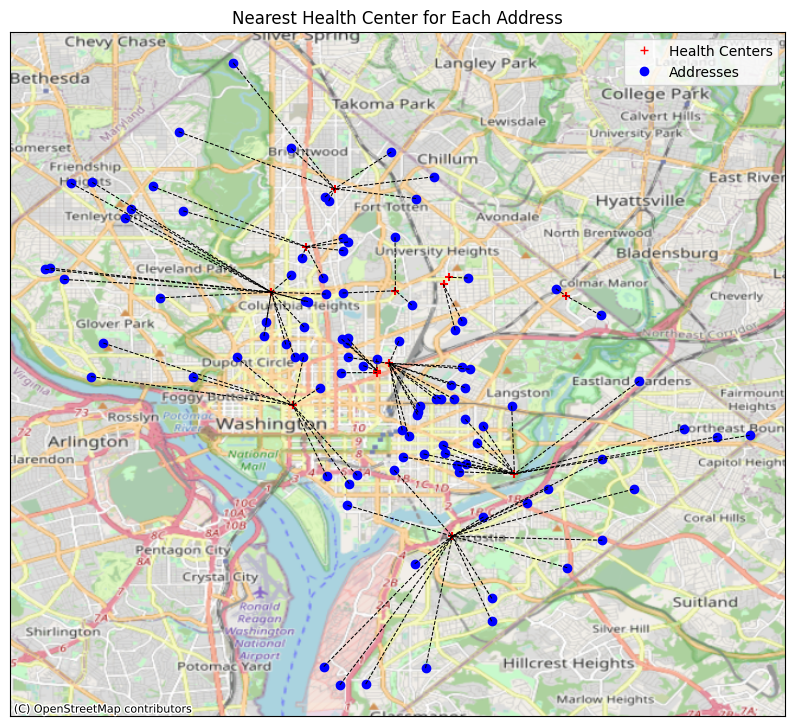

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
address_gdf.plot(ax=ax, color='blue', alpha=1, marker='o')
matrix_gdf.plot(ax=ax, color='black', linestyle='--', linewidth=0.75)
health_gdf.plot(ax=ax, color='red', alpha=1, marker='+')

cx.add_basemap(ax, crs=health_gdf.crs, source=cx.providers.OpenStreetMap.Mapnik)

legend_elements = [
    plt.plot([],[], color='red', alpha=1, marker='+', label='Health Centers', ls='')[0],
    plt.plot([],[], color='blue', alpha=1, marker='o', label='Addresses', ls='')[0]]
ax.legend(handles=legend_elements, loc='upper right')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Nearest Health Center for Each Address')
plt.show()

Save the results.

In [ ]:
output_file = 'matrix.gpkg'
output_path = os.path.join(output_folder, output_file)

origin_gdf.to_file(driver='GPKG', filename=output_path, layer='origins')
destination_gdf.to_file(driver='GPKG', filename=output_path, layer='destinations')
matrix_gdf.to_file(driver='GPKG', filename=output_path, layer='distance_matrix')